In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
PLOTFILE = '/tmp/AnatomicalTracts_Full_TKO.pdf'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/AnatomicalTracts/'
tko_ext = '.vtp'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtp'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

# qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
# qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
# dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_Intra-CBLM-I&P_left.vtp 307923
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_SF_left.vtp 477583
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_Sup-FP_right.vtp 160417
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_TP_right.vtp 303059
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_Sup-P_right.vtp 872874
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_ICP_right.vtp 52258
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_CC5_comm.vtp 595097
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_CC3_comm.vtp 489244
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_CC6_comm.vtp 1506639
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_ICP_left.vtp 74224
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_Sup-P_left.vtp 714867
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_MdLF_left.vtp 674917
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_EmC_left.vtp 305921
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts/T_IOFF_right.vtp 820706
/home/haehn/

In [4]:
runs = {}

In [5]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits,coords_only=False,  binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

In [6]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, coords_only=False, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

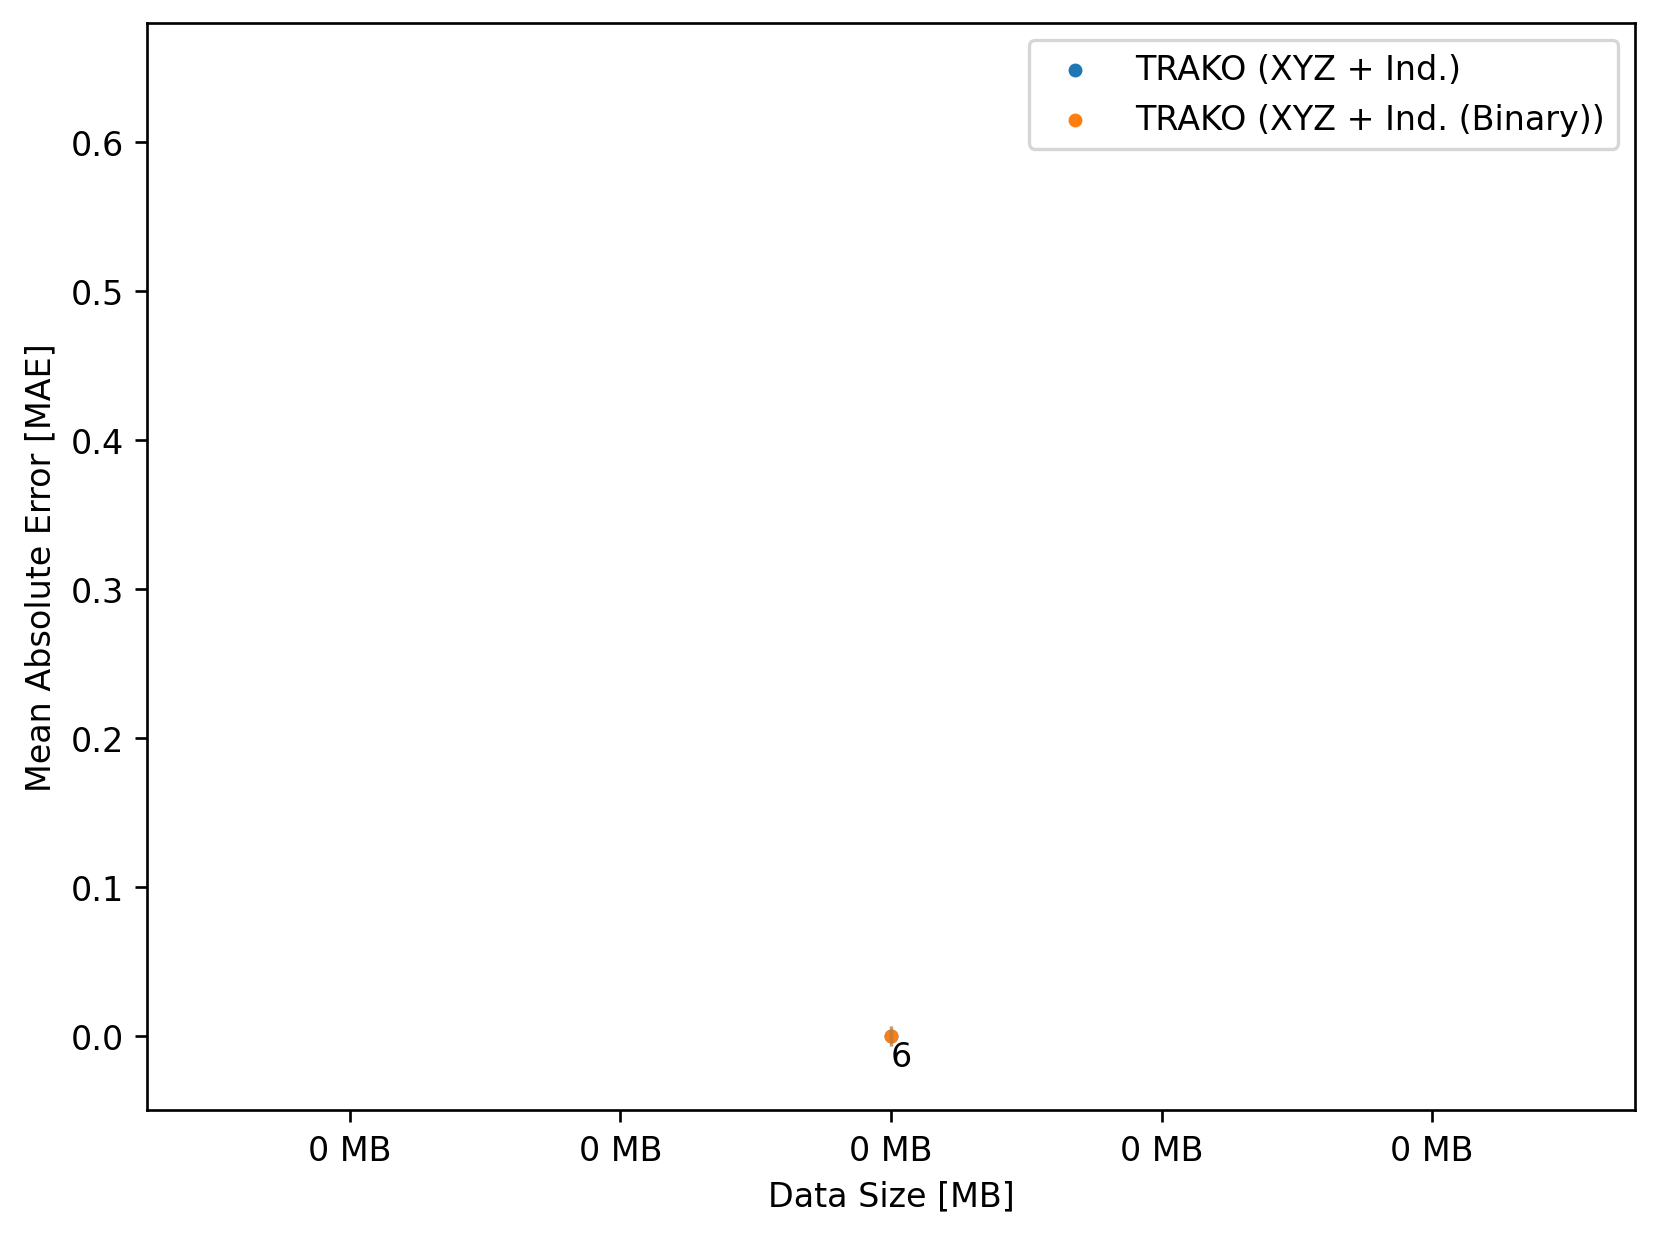

In [7]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename=PLOTFILE)

In [8]:
print(input_size/1000000)

0.4443614594594595


In [9]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=1)

IndexError: list index out of range